In [3]:
import numpy as np 
import pandas as pd
        

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import median_absolute_error

In [9]:
import os 
for dirname,_,filnames in os.walk('D:\Covid19-dataset'):
    for filname in filnames:
        print(os.path.join(dirname , filname))

D:\Covid19-dataset\test\Covid\0100.jpeg
D:\Covid19-dataset\test\Covid\0102.jpeg
D:\Covid19-dataset\test\Covid\0105.png
D:\Covid19-dataset\test\Covid\0106.jpeg
D:\Covid19-dataset\test\Covid\0108.jpeg
D:\Covid19-dataset\test\Covid\0111.jpg
D:\Covid19-dataset\test\Covid\0112.jpg
D:\Covid19-dataset\test\Covid\0113.jpg
D:\Covid19-dataset\test\Covid\0115.jpeg
D:\Covid19-dataset\test\Covid\0118.jpeg
D:\Covid19-dataset\test\Covid\0119.jpeg
D:\Covid19-dataset\test\Covid\0120.jpg
D:\Covid19-dataset\test\Covid\094.png
D:\Covid19-dataset\test\Covid\096.png
D:\Covid19-dataset\test\Covid\098.jpeg
D:\Covid19-dataset\test\Covid\auntminnie-2020_01_31_20_24_2322_2020_01_31_x-ray_coronavirus_US.jpg
D:\Covid19-dataset\test\Covid\auntminnie-a-2020_01_28_23_51_6665_2020_01_28_Vietnam_coronavirus.jpeg
D:\Covid19-dataset\test\Covid\auntminnie-b-2020_01_28_23_51_6665_2020_01_28_Vietnam_coronavirus.jpeg
D:\Covid19-dataset\test\Covid\auntminnie-c-2020_01_28_23_51_6665_2020_01_28_Vietnam_coronavirus.jpeg
D:\Covid

In [6]:
base_dir='D:\Covid19-dataset'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'test')

# Directory with our training cat/dog pictures
train_covid_dir = os.path.join(train_dir, 'Covid')
train_normal_dir = os.path.join(train_dir, 'Normal')
train_pneumonia_dir = os.path.join(train_dir, 'Viral Pneumonia')

# Directory with our validation cat/dog pictures
validation_covid_dir = os.path.join(validation_dir, 'Covid')
validation_normal_dir = os.path.join(validation_dir, 'Normal')
validation_pneumonia_dir = os.path.join(validation_dir, 'Viral Pneumonia')

In [10]:
train_covid_fnames = os.listdir(train_covid_dir)
train_normal_fnames = os.listdir(train_normal_dir)
train_pneumonia_fnames = os.listdir(train_pneumonia_dir)

print(train_covid_fnames[:10])
print(train_normal_fnames[:10])
print(train_pneumonia_fnames[:10])

['01.jpeg', '010.png', '012.jpeg', '015.jpg', '019.png', '02.jpeg', '020.jpg', '021.jpeg', '022.jpeg', '024.jpeg']
['01.jpeg', '010.jpeg', '011.jpeg', '012.jpeg', '013.jpeg', '014.jpeg', '015.jpeg', '016.jpeg', '017.jpeg', '018.jpeg']
['01.jpeg', '010.jpeg', '011.jpeg', '012.jpeg', '013.jpeg', '016.jpeg', '018.jpeg', '019.jpeg', '02.jpeg', '020.jpeg']


In [23]:
%matplotlib inline
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

# Parameters for our graph; we'll output images in a 4x4 configuration

nrows = 6
ncols = 4

pic_index = 0 # Index for iterating over images

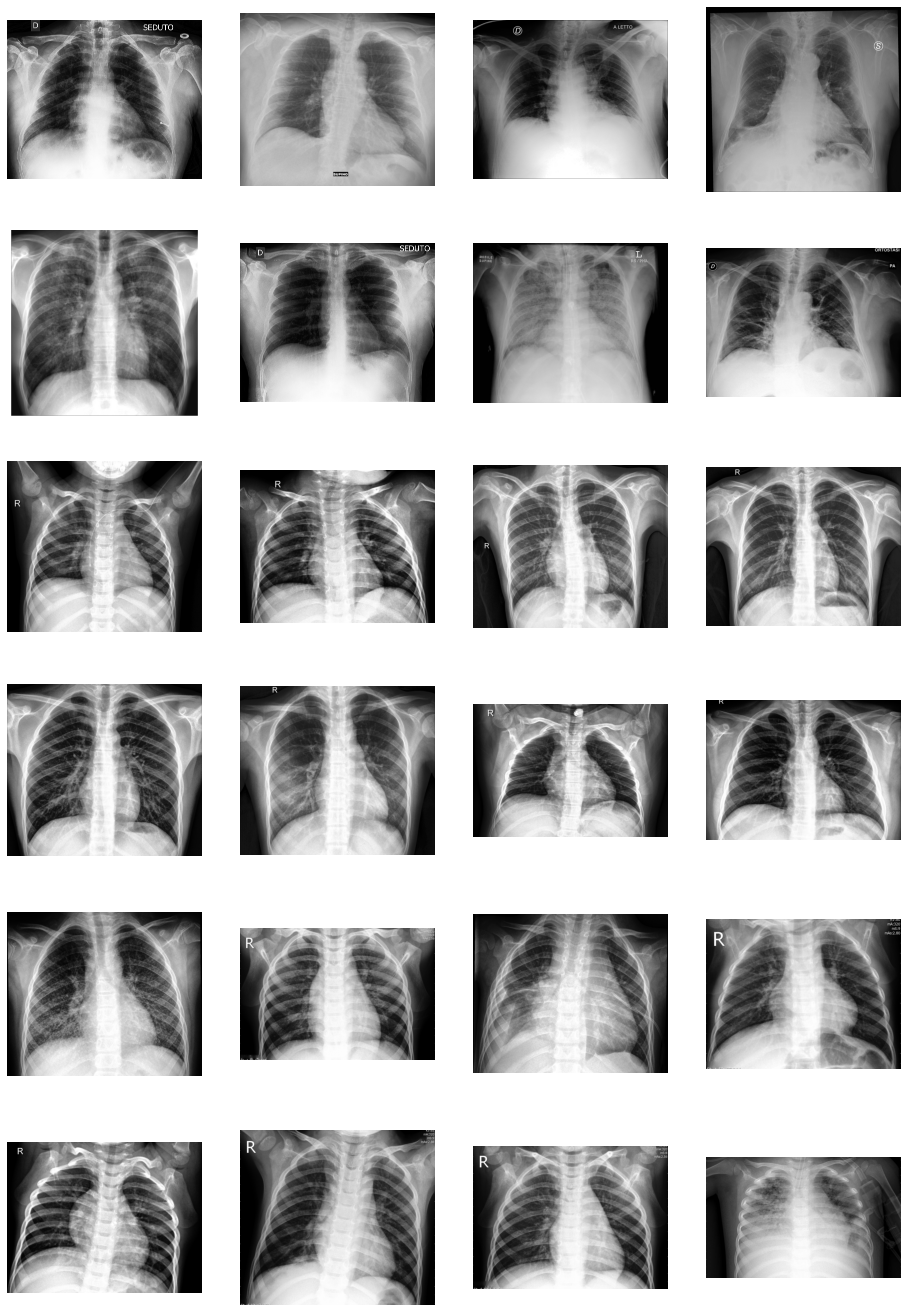

In [24]:

# Set up matplotlib fig, and size it to fit 4x4 pics
import matplotlib.pyplot as plt
fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)
pic_index+=8

next_covid_pix = [os.path.join(train_covid_dir, fname) 
                for fname in train_covid_fnames[ pic_index-8:pic_index] 
               ]

next_normal_pix = [os.path.join(train_normal_dir, fname) 
                for fname in train_normal_fnames[ pic_index-8:pic_index]
               ]

next_pneumonia_pix = [os.path.join(train_pneumonia_dir, fname) 
                for fname in train_pneumonia_fnames[ pic_index-8:pic_index]
               ]
for i, img_path in enumerate(next_covid_pix+next_normal_pix+next_pneumonia_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [25]:
import tensorflow as tf
 
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2), 
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(), 
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'), 
    tf.keras.layers.Dense(3, activation='softmax')  
])

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 64)       0

In [27]:
model.compile(optimizer='adam', loss= 'categorical_crossentropy', metrics=['accuracy'])

In [31]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# All images will be rescaled by 1./255.
train_datagen = ImageDataGenerator( rescale = 1.0/255. )
test_datagen  = ImageDataGenerator( rescale = 1.0/255. )

# --------------------
# Flow training images in batches of 20 using train_datagen generator
# --------------------
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=20,
                                                    class_mode='categorical',
                                                    target_size=(150, 150))     
# --------------------
# Flow validation images in batches of 20 using test_datagen generator
# --------------------
validation_generator =  test_datagen.flow_from_directory(validation_dir,
                                                         batch_size=20,
                                                         class_mode  = 'categorical',
                                                         target_size = (150, 150))

Found 251 images belonging to 3 classes.
Found 66 images belonging to 3 classes.


In [32]:
history = model.fit(train_generator,
                              validation_data=validation_generator,
                              steps_per_epoch=12,
                              epochs=15,
                              validation_steps = 3,
                              verbose=2)

Epoch 1/15
12/12 - 19s - loss: 1.2680 - accuracy: 0.5671 - val_loss: 0.7467 - val_accuracy: 0.6833 - 19s/epoch - 2s/step
Epoch 2/15
12/12 - 13s - loss: 0.4452 - accuracy: 0.8355 - val_loss: 0.3823 - val_accuracy: 0.7667 - 13s/epoch - 1s/step
Epoch 3/15
12/12 - 13s - loss: 0.2302 - accuracy: 0.9091 - val_loss: 0.3992 - val_accuracy: 0.7667 - 13s/epoch - 1s/step
Epoch 4/15
12/12 - 15s - loss: 0.2125 - accuracy: 0.9134 - val_loss: 0.2684 - val_accuracy: 0.9167 - 15s/epoch - 1s/step
Epoch 5/15
12/12 - 14s - loss: 0.1660 - accuracy: 0.9481 - val_loss: 0.3128 - val_accuracy: 0.8833 - 14s/epoch - 1s/step
Epoch 6/15
12/12 - 12s - loss: 0.0996 - accuracy: 0.9610 - val_loss: 0.2737 - val_accuracy: 0.9000 - 12s/epoch - 1s/step
Epoch 7/15
12/12 - 12s - loss: 0.0561 - accuracy: 0.9913 - val_loss: 0.3479 - val_accuracy: 0.8667 - 12s/epoch - 1s/step
Epoch 8/15
12/12 - 13s - loss: 0.0432 - accuracy: 0.9870 - val_loss: 0.1851 - val_accuracy: 0.9167 - 13s/epoch - 1s/step
Epoch 9/15
12/12 - 15s - loss: 0